Evaluation Project - 5

# Census Income Project

## Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

## Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:  

1.A single cell estimate of the population 16+ for each state.  

2.Controls for Hispanic Origin by age and sex.  

3.Controls by Race, age and sex.  

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset
df_ce=pd.read_csv("Census_Income_Project.csv")
df_ce

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# First 10 rows
df_ce.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
# Last 10 rows
df_ce.tail(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32550,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32551,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32552,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
# Sample
df_ce.sample(4)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
25129,29,Private,95423,HS-grad,9,Married-AF-spouse,Transport-moving,Husband,White,Male,0,0,80,United-States,<=50K
4546,37,Private,31023,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,51,United-States,<=50K
13456,66,Self-emp-inc,220543,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
31378,67,Self-emp-inc,112318,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [6]:
df_ce.shape

(32560, 15)

This dataset contains `32560 rows` & `15 columns`.

# Preprocessing & EDA

In [7]:
# Column Names
df_ce.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [8]:
# Column Data Types
df_ce.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Most of the columns are of 'object' datatype & 'integer' datatype.

In [9]:
# Checking for null values
df_ce.isnull()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Sum of null values if any...
df_ce.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

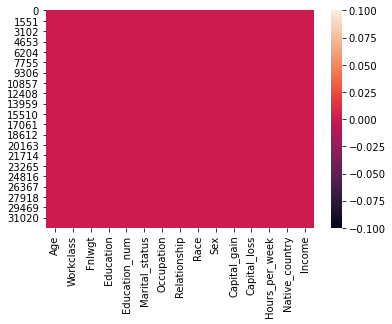

In [11]:
# Heatmap of null values
sns.heatmap(df_ce.isnull())

As seen in the above visualization there are no null values present in the dataset.

In [12]:
# Value counts of each column.
for i in df_ce.columns:
        print(df_ce[i].value_counts())
        print('-----------------------------------------------------')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
-----------------------------------------------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
-----------------------------------------------------
203488    13
123011    13
164190    13
121124    12
148995    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: Fnlwgt, Length: 21647, dtype: int64
-----------------------------------------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th

We can see that there are some '?' entries in Workclass, Occupation and Native_country columns. So we will replace this '?' with the mode of the above columns, since they are categorical columns.

In [13]:
# Mode
df_ce["Workclass"].mode() 

0     Private
dtype: object

In [14]:
# Replacing '?' with mode value
df_ce['Workclass'] = df_ce.Workclass.str.replace('?', 'Private')

In [15]:
# Mode
df_ce["Occupation"].mode() 

0     Prof-specialty
dtype: object

In [16]:
# Replacing '?' with mode value
df_ce['Occupation'] = df_ce.Occupation.str.replace('?', 'Private')

In [17]:
# Mode
df_ce["Native_country"].mode() 

0     United-States
dtype: object

In [18]:
# Replacing '?' with mode value
df_ce['Native_country'] = df_ce.Native_country.str.replace('?', 'Private')

In [19]:
df_ce["Workclass"].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [20]:
df_ce["Occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Private              1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [21]:
df_ce["Native_country"].value_counts()

 United-States                 29169
 Mexico                          643
 Private                         583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

All the `'?'` values have been removed from the respective columns.

As seen in value counts, the columns `Capital_gain` & `Capital_loss` have more than 90 % zero values. We shall drop these columns for model prediction.

In [22]:
# Dropping columns with zero values
df_ce.drop("Capital_gain",axis=1,inplace=True)
df_ce.drop("Capital_loss",axis=1,inplace=True)

In [23]:
df_ce.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


In [24]:
# Means of our target variable 'Income'
df_ce.groupby('Income').mean()

,Age,Fnlwgt,Education_num,Hours_per_week
Income,,,,
<=50K,36.783648,190345.429467,9.594927,38.840163
>50K,44.249841,188005.000000,11.611657,45.473026


In [25]:
df_ce.corr()

,Age,Fnlwgt,Education_num,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.148127
Hours_per_week,0.068756,-0.018770,0.148127,1.000000


In [26]:
df_ce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Hours_per_week  32560 non-null  int64 
 11  Native_country  32560 non-null  object
 12  Income          32560 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [27]:
# Unique values of columns
df_ce.nunique()

Age                  73
Workclass             8
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [28]:
# Unique values of target variable column
df_ce['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [29]:
#Checking for any empty observation in target column
df_ce.loc[df_ce['Income'] == " "]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income


No empty values in target column.

In [30]:
df_ce['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

# Data Visualization

In [31]:
df_ce.nunique()

Age                  73
Workclass             8
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [32]:
# Categorical Columns
categorical_columns=[]
for i in df_ce.dtypes.index:
    if df_ce.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [33]:
# Numerical Columns
numerical_columns=[]
for i in df_ce.dtypes.index:
    if df_ce.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


## Univariate Analysis

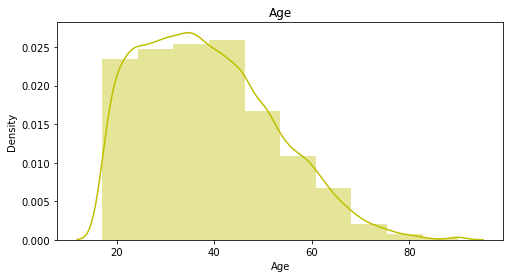

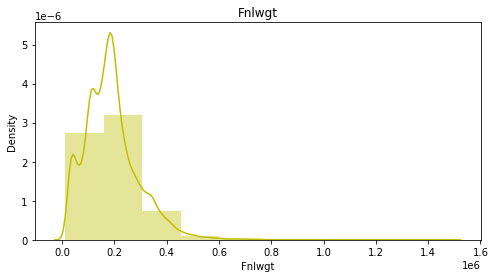

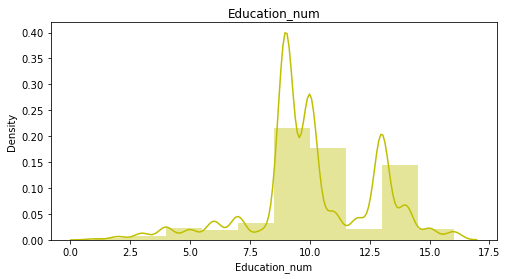

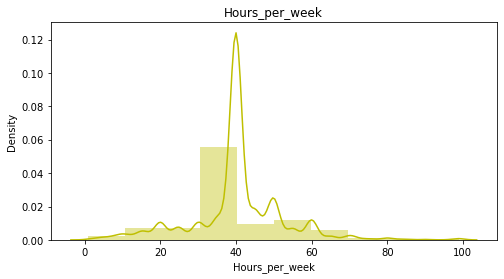

In [34]:
for i in df_ce[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df_ce[i], bins = 10, color="y")
    plt.title(i)
    plt.show()

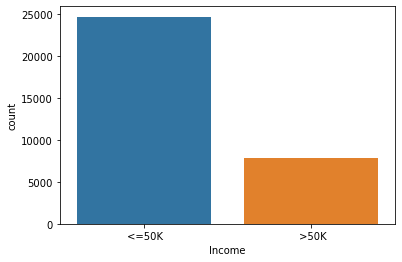

In [35]:
sns.countplot(df_ce['Income']);

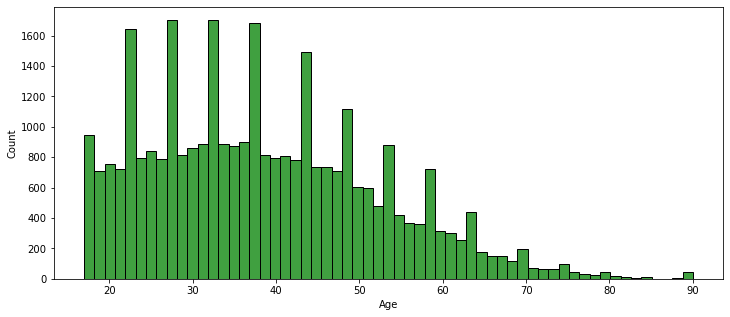

In [36]:
plt.figure(figsize=(12,5))
sns.histplot(df_ce['Age'],color='green')
plt.show();

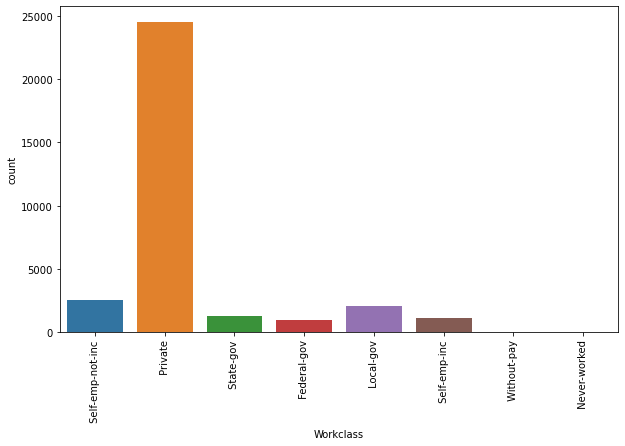

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(df_ce['Workclass'])
plt.xticks(rotation=90)
plt.show();

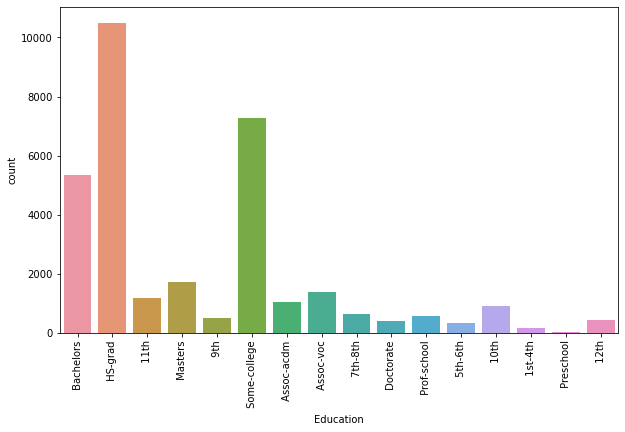

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(df_ce['Education'])
plt.xticks(rotation=90)
plt.show();

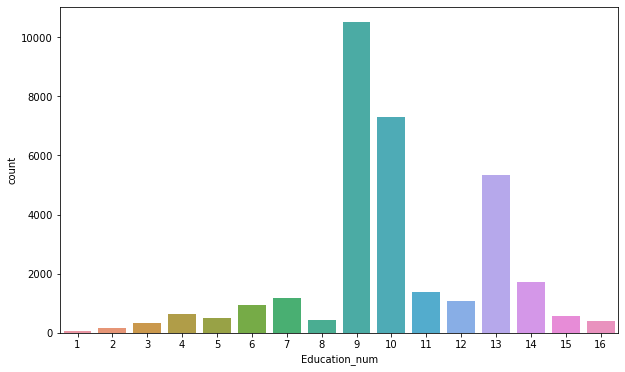

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(df_ce['Education_num'])
plt.show();

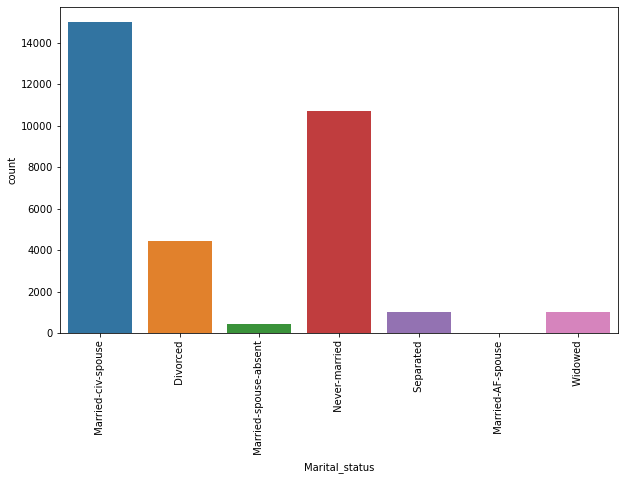

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(df_ce['Marital_status'])
plt.xticks(rotation=90)
plt.show();

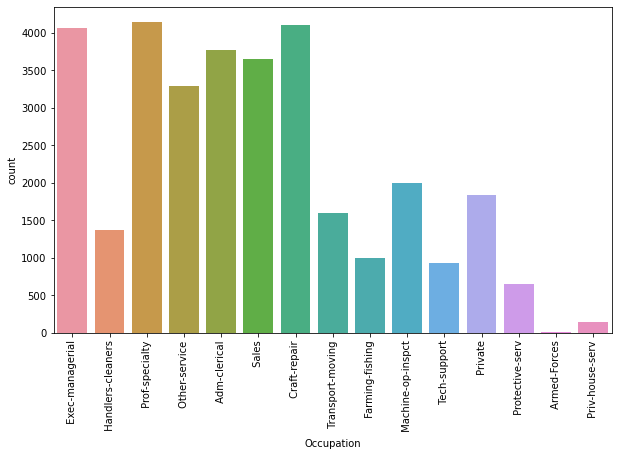

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(df_ce['Occupation'])
plt.xticks(rotation=90)
plt.show();

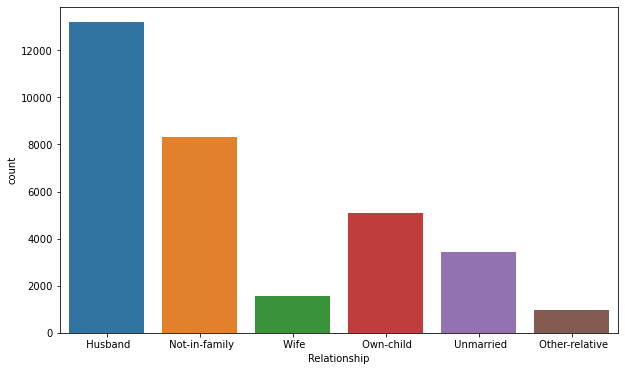

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(df_ce['Relationship'])
plt.show();

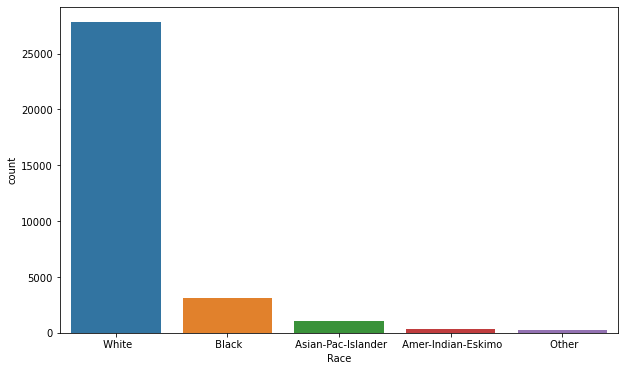

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(df_ce['Race'])
plt.show();

 Male      21789
 Female    10771
Name: Sex, dtype: int64


<AxesSubplot:ylabel='Sex'>

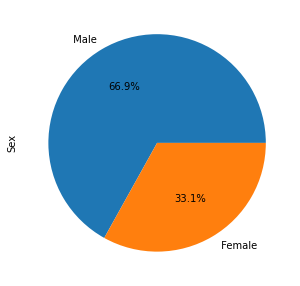

In [44]:
plt.figure(figsize=(10,5))
print(df_ce['Sex'].value_counts())
df_ce['Sex'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:xlabel='Hours_per_week'>

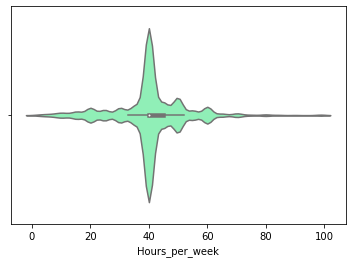

In [45]:
sns.violinplot(x="Hours_per_week",data=df_ce,palette='rainbow')

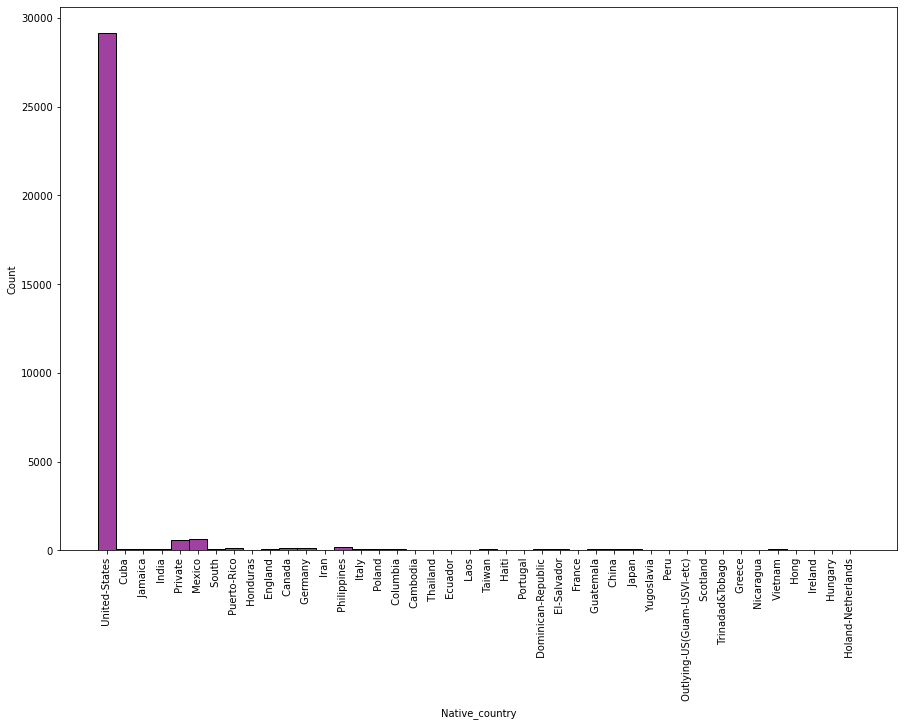

In [46]:
plt.figure(figsize=[15,10])
sns.histplot(df_ce['Native_country'],color='purple')
plt.xticks(rotation=90);

## Bi-variate Analysis

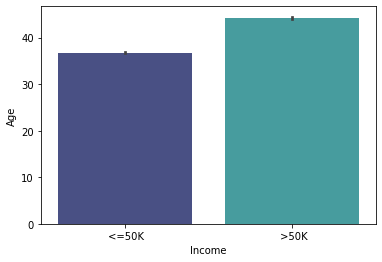

In [47]:
sns.barplot(x='Income',y='Age',data=df_ce,palette='mako');

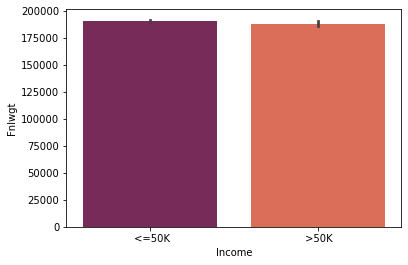

In [48]:
sns.barplot(x='Income',y='Fnlwgt',data=df_ce,palette='rocket');

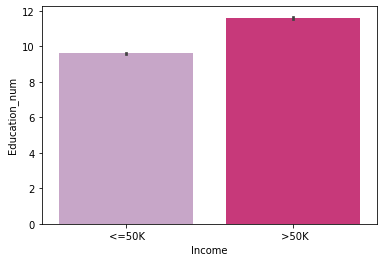

In [49]:
sns.barplot(x='Income',y='Education_num',data=df_ce,palette='PuRd');

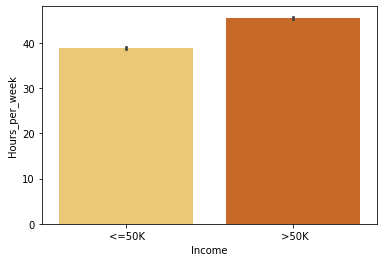

In [50]:
sns.barplot(x='Income',y='Hours_per_week',data=df_ce,palette='YlOrBr');

<AxesSubplot:xlabel='Workclass', ylabel='count'>

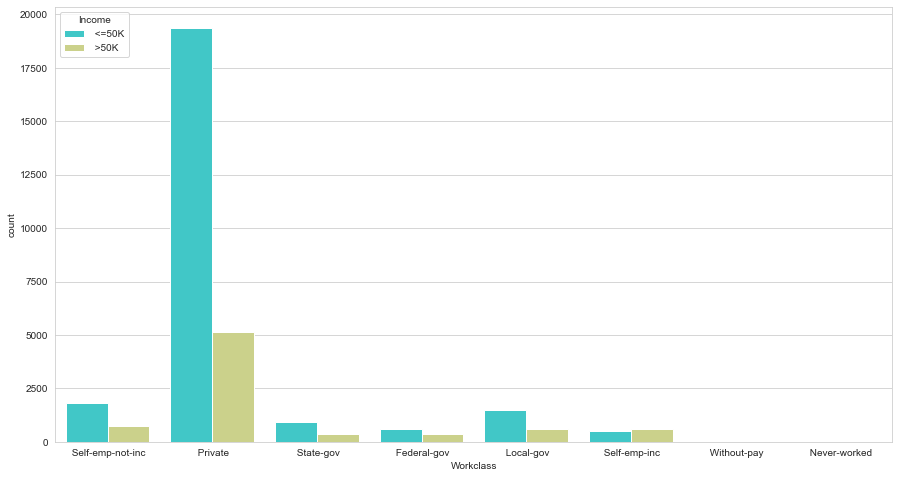

In [51]:
plt.figure(figsize=[15,8])
sns.set_style('whitegrid')
sns.countplot(x='Workclass',hue='Income',data=df_ce,palette='rainbow')

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

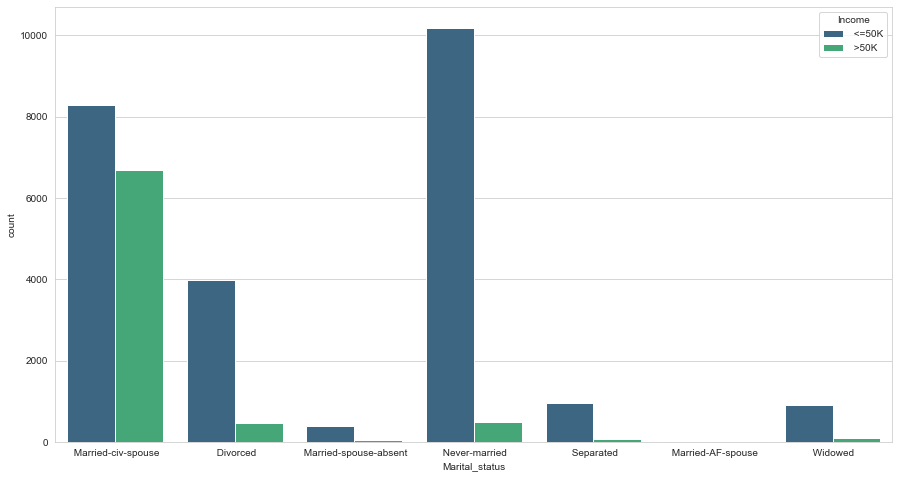

In [52]:
plt.figure(figsize=[15,8])
sns.set_style('whitegrid')
sns.countplot(x='Marital_status',hue='Income',data=df_ce,palette='viridis')

<AxesSubplot:xlabel='Relationship', ylabel='count'>

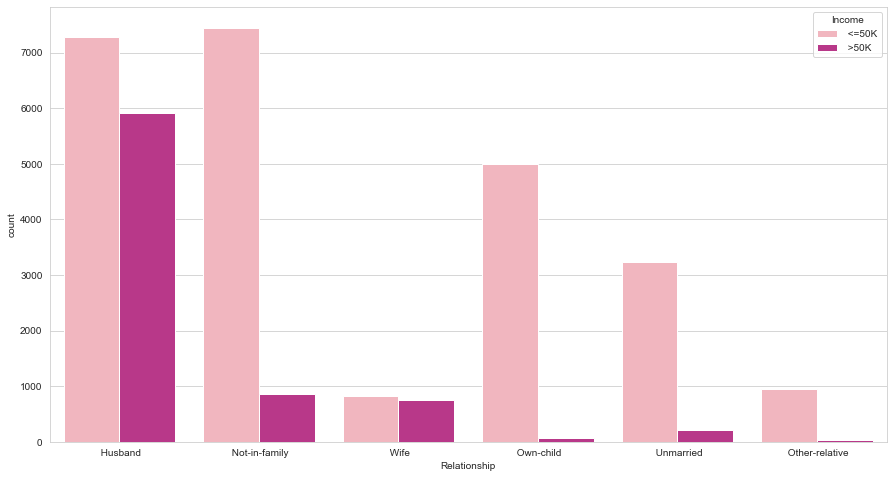

In [53]:
plt.figure(figsize=[15,8])
sns.set_style('whitegrid')
sns.countplot(x='Relationship',hue='Income',data=df_ce,palette='RdPu')

<AxesSubplot:xlabel='Race', ylabel='count'>

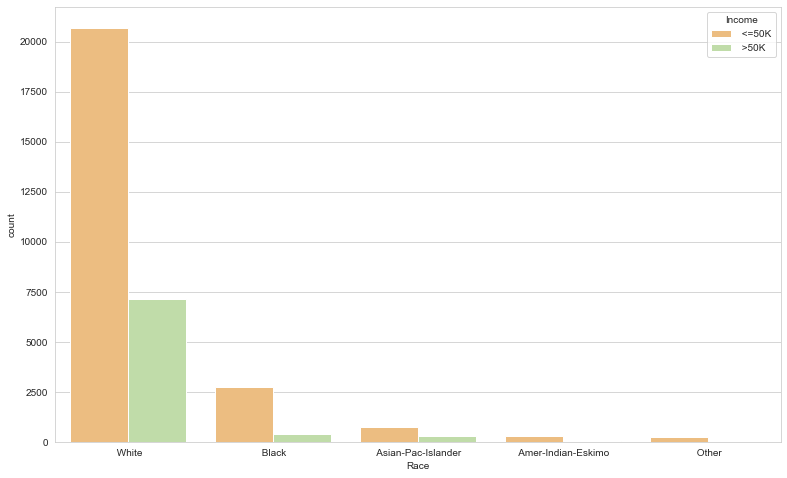

In [54]:
plt.figure(figsize=[13,8])
sns.set_style('whitegrid')
sns.countplot(x='Race',hue='Income',data=df_ce,palette='Spectral')

<AxesSubplot:xlabel='Sex', ylabel='count'>

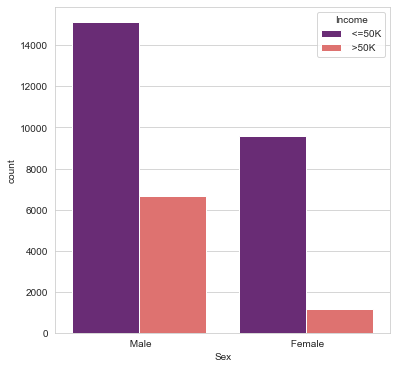

In [55]:
plt.figure(figsize=[6,6])
sns.set_style('whitegrid')
sns.countplot(x='Sex',hue='Income',data=df_ce,palette='magma')

<AxesSubplot:title={'center':'Comparision between Income and Age'}, xlabel='Age', ylabel='Income'>

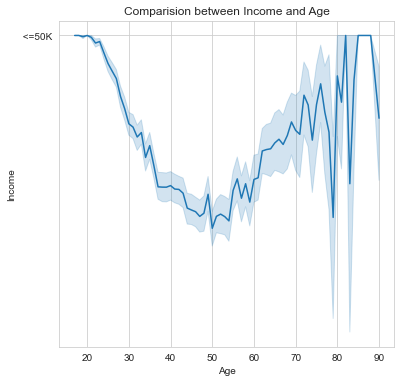

In [56]:
plt.figure(figsize=[6,6])
plt.title('Comparision between Income and Age')
sns.lineplot(df_ce['Age'],df_ce['Income'])

<AxesSubplot:title={'center':'Comparision between Income and Hours_per_week'}, xlabel='Hours_per_week', ylabel='Income'>

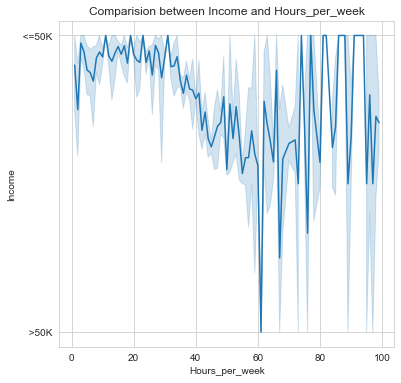

In [57]:
plt.figure(figsize=[6,6])
plt.title('Comparision between Income and Hours_per_week')
sns.lineplot(df_ce['Hours_per_week'],df_ce['Income'])

<AxesSubplot:title={'center':'Comparision between Income and Fnlwgt'}, xlabel='Fnlwgt', ylabel='Income'>

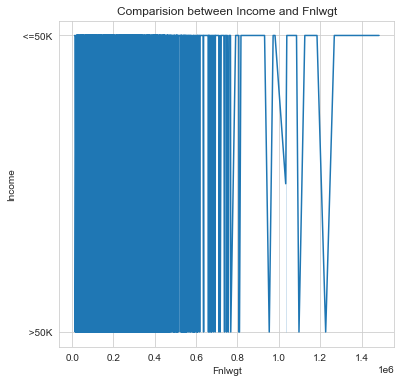

In [58]:
plt.figure(figsize=[6,6])
plt.title('Comparision between Income and Fnlwgt')
sns.lineplot(df_ce['Fnlwgt'],df_ce['Income'])

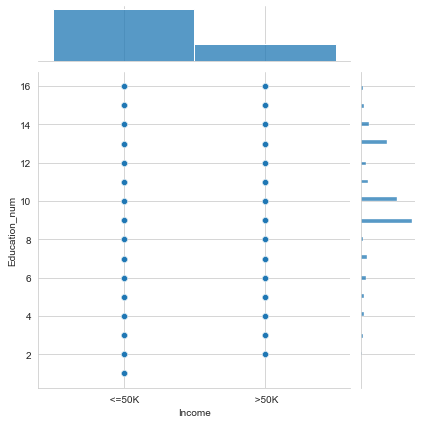

In [56]:
sns.jointplot(data=df_ce,x="Income",y="Education_num")

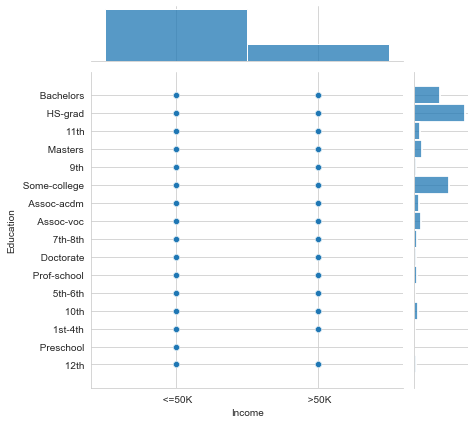

In [57]:
sns.jointplot(data=df_ce,x="Income",y="Education")

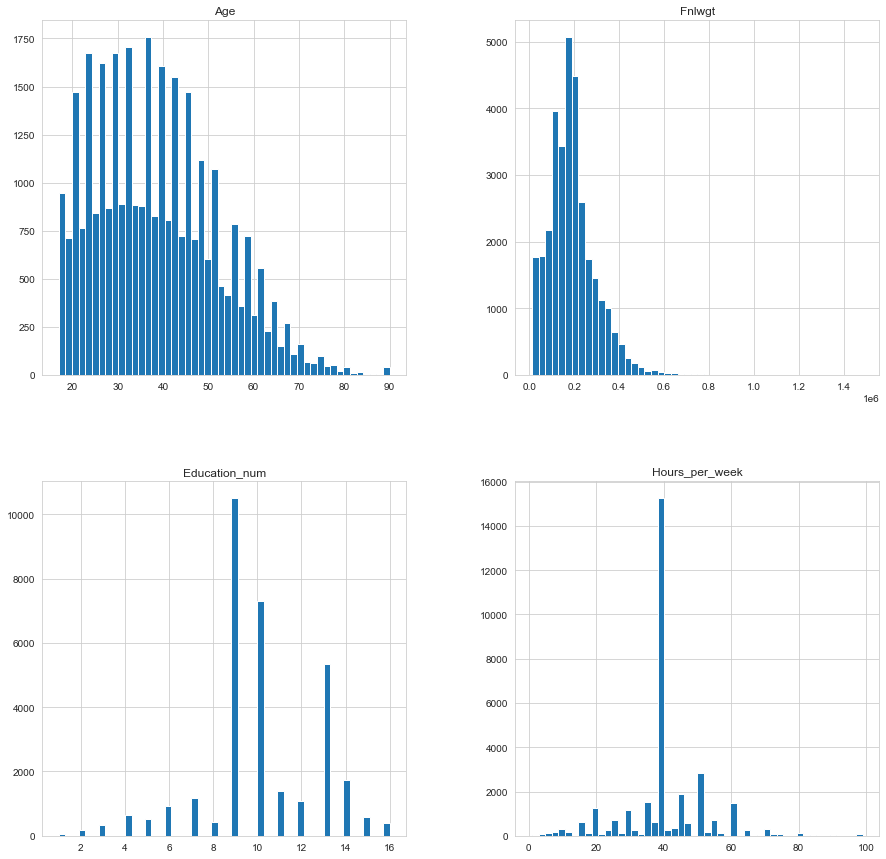

In [58]:
df_ce.hist(figsize=(15,15),bins=50)
plt.show()

# Encoding the Data Frame

In [56]:
df_ce.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [57]:
df_ce.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Label Encoder is used to encode the dataframe to make it easier to build the model.

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [59]:
df_ce['Workclass'] = le.fit_transform(df_ce['Workclass'])
df_ce['Education'] = le.fit_transform(df_ce['Education'])
df_ce['Marital_status'] = le.fit_transform(df_ce['Marital_status'])
df_ce['Occupation'] = le.fit_transform(df_ce['Occupation'])
df_ce['Relationship'] = le.fit_transform(df_ce['Relationship'])
df_ce['Race'] = le.fit_transform(df_ce['Race'])
df_ce['Sex'] = le.fit_transform(df_ce['Sex'])
df_ce['Native_country'] = le.fit_transform(df_ce['Native_country'])
df_ce['Income'] = le.fit_transform(df_ce['Income'])

In [60]:
df_ce

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,13,39,0
1,38,3,215646,11,9,0,5,1,4,1,40,39,0
2,53,3,234721,1,7,2,5,0,2,1,40,39,0
3,28,3,338409,9,13,2,10,5,2,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,13,5,4,0,38,39,0
32556,40,3,154374,11,9,2,6,0,4,1,40,39,1
32557,58,3,151910,11,9,6,0,4,4,0,40,39,0
32558,22,3,201490,11,9,4,0,3,4,1,20,39,0


# Outliers

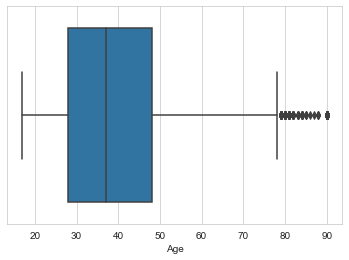

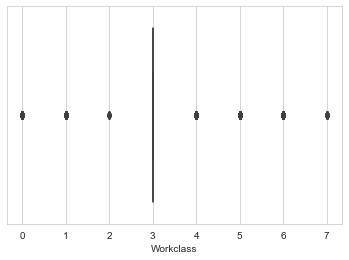

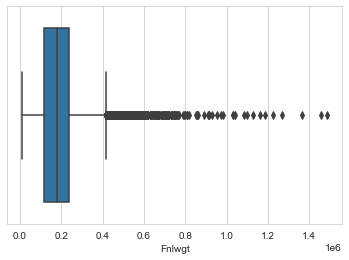

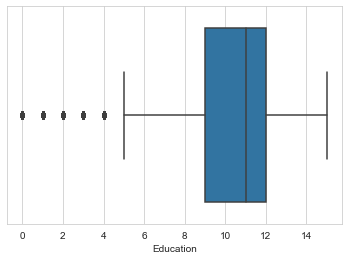

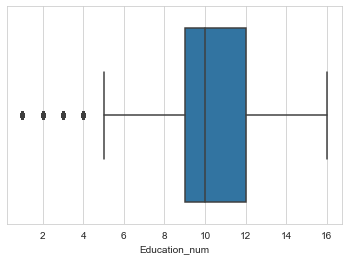

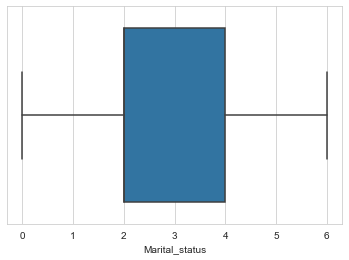

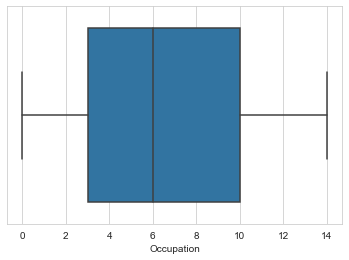

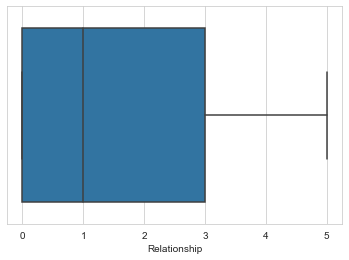

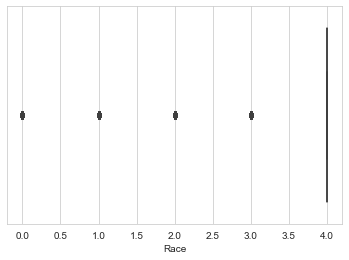

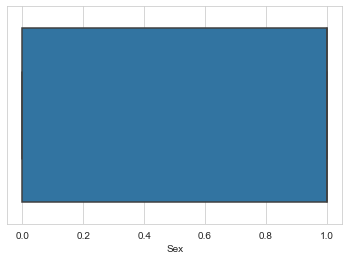

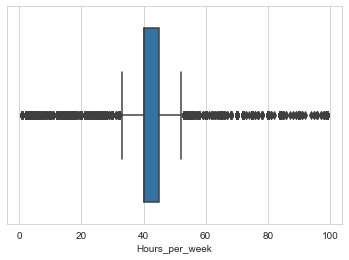

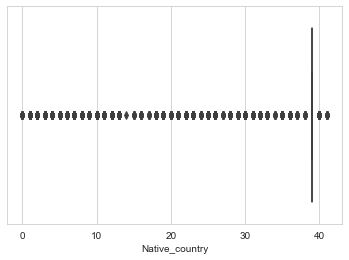

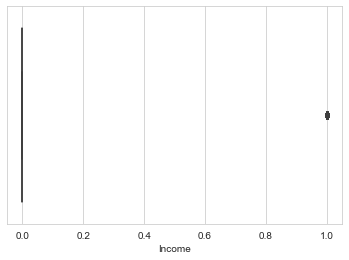

In [61]:
for i in df_ce.columns:
    sns.boxplot(df_ce[i])
    plt.show()

Age                  AxesSubplot(0.125,0.536818;0.0596154x0.343182)
Workclass         AxesSubplot(0.196538,0.536818;0.0596154x0.343182)
Fnlwgt            AxesSubplot(0.268077,0.536818;0.0596154x0.343182)
Education         AxesSubplot(0.339615,0.536818;0.0596154x0.343182)
Education_num     AxesSubplot(0.411154,0.536818;0.0596154x0.343182)
Marital_status    AxesSubplot(0.482692,0.536818;0.0596154x0.343182)
Occupation        AxesSubplot(0.554231,0.536818;0.0596154x0.343182)
Relationship      AxesSubplot(0.625769,0.536818;0.0596154x0.343182)
Race              AxesSubplot(0.697308,0.536818;0.0596154x0.343182)
Sex               AxesSubplot(0.768846,0.536818;0.0596154x0.343182)
Hours_per_week    AxesSubplot(0.840385,0.536818;0.0596154x0.343182)
Native_country          AxesSubplot(0.125,0.125;0.0596154x0.343182)
Income               AxesSubplot(0.196538,0.125;0.0596154x0.343182)
dtype: object

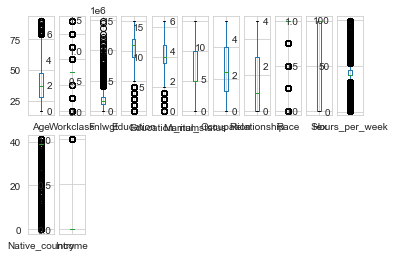

In [62]:
df_ce.plot(kind='box',subplots=True,layout=(2,11))

As seen above, there are outliers present in `Age, Workclass, Fnlwgt, Education, Education_num, Race, Hours_per_week, Native_country & Income`.

# Removing Outliers

We shall remove the outliers present in the dataset using Z-Score Method.

In [63]:
df_outliers=df_ce[["Age", "Workclass", "Fnlwgt","Education","Education_num","Race","Hours_per_week","Native_country","Income"]]

In [64]:
from scipy.stats import zscore

z=np.abs(zscore(df_outliers))
df_new_ce=df_ce[(z<3).all(axis=1)]
df_new_ce

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,13,39,0
1,38,3,215646,11,9,0,5,1,4,1,40,39,0
2,53,3,234721,1,7,2,5,0,2,1,40,39,0
4,37,3,284582,12,14,2,3,5,4,0,40,39,0
5,49,3,160187,6,5,3,7,1,2,0,16,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,13,5,4,0,38,39,0
32556,40,3,154374,11,9,2,6,0,4,1,40,39,1
32557,58,3,151910,11,9,6,0,4,4,0,40,39,0
32558,22,3,201490,11,9,4,0,3,4,1,20,39,0


In [65]:
df_new_ce.shape

(29296, 13)

In [66]:
df_ce.shape

(32560, 13)

In [67]:
Data_loss=((32560-29296)/32560)*100
Data_loss

10.024570024570025

The data loss after z-score is `10.02 %`.

# Skewness

In [68]:
df_new_ce.skew()

Age               0.466130
Workclass         0.070097
Fnlwgt            0.629685
Education        -0.962352
Education_num    -0.134690
Marital_status   -0.021495
Occupation        0.099432
Relationship      0.788384
Race             -2.621072
Sex              -0.716832
Hours_per_week   -0.349106
Native_country   -4.852544
Income            1.198690
dtype: float64

In [69]:
df_skew=["Age", "Workclass", "Fnlwgt","Education","Education_num","Race","Hours_per_week","Native_country"]

We shall use Power Transformer to remove skewness.

In [70]:
from sklearn.preprocessing import PowerTransformer
scal = PowerTransformer(method='yeo-johnson')

In [71]:
df_new_ce[df_skew] = scal.fit_transform(df_new_ce[df_skew].values)

In [72]:
df_new_ce[df_skew].skew()

Age              -0.020733
Workclass         0.215106
Fnlwgt           -0.034006
Education        -0.306616
Education_num     0.023594
Race             -2.557872
Hours_per_week    0.105056
Native_country    0.293479
dtype: float64

In [73]:
df_new_ce

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,0.912041,1.752355,-1.126314,-0.497768,1.188851,2,3,0,0.34456,1,-2.226410,0.203454,0
1,0.107725,-0.091133,0.415543,0.073630,-0.481551,0,5,1,0.34456,1,-0.056269,0.203454,0
2,1.089465,-0.091133,0.596075,-2.085886,-1.272302,2,5,0,-2.90534,1,-0.056269,0.203454,0
4,0.032269,-0.091133,1.038957,0.380933,1.622162,2,3,5,0.34456,0,-0.056269,0.203454,0
5,0.851076,-0.091133,-0.155253,-1.237389,-2.025741,3,7,1,-2.90534,0,-2.022392,-3.872384,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.824077,-0.091133,0.801432,-1.007517,0.761431,2,13,5,0.34456,0,-0.238248,0.203454,0
32556,0.254186,-0.091133,-0.219933,0.073630,-0.481551,2,6,0,0.34456,1,-0.056269,0.203454,1
32557,1.368664,-0.091133,-0.247681,0.073630,-0.481551,6,0,4,0.34456,0,-0.056269,0.203454,0
32558,-1.346776,-0.091133,0.276859,0.073630,-0.481551,4,0,3,0.34456,1,-1.732854,0.203454,0


In [74]:
df_new_ce[np.abs(df_new_ce)>0.25].all()

Age               True
Workclass         True
Fnlwgt            True
Education         True
Education_num     True
Marital_status    True
Occupation        True
Relationship      True
Race              True
Sex               True
Hours_per_week    True
Native_country    True
Income            True
dtype: bool

# Correlation

In [75]:
df_new_ce.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.036264,-0.068873,-0.009991,0.090993,-0.329253,-0.004325,-0.288028,0.024006,0.106206,0.152055,0.023512,0.276108
Workclass,0.036264,1.000000,-0.027569,0.006039,0.008221,-0.022483,0.005530,-0.058268,0.065714,0.071729,0.039999,0.003927,0.005179
Fnlwgt,-0.068873,-0.027569,1.000000,-0.020947,-0.034682,0.028435,0.002778,0.015622,-0.101549,0.019399,-0.022393,-0.081534,-0.006874
Education,-0.009991,0.006039,-0.020947,1.000000,0.261209,-0.026487,-0.033978,0.004813,0.023078,-0.035319,0.033655,0.074858,0.049929
Education_num,0.090993,0.008221,-0.034682,0.261209,1.000000,-0.065530,0.104194,-0.101392,0.089833,0.013233,0.170443,0.098135,0.342729
Marital_status,-0.329253,-0.022483,0.028435,-0.026487,-0.065530,1.000000,0.028972,0.184749,-0.087326,-0.130086,-0.194688,-0.035198,-0.197823
Occupation,-0.004325,0.005530,0.002778,-0.033978,0.104194,0.028972,1.000000,-0.044640,0.007079,0.048647,-0.001059,0.010612,0.047458
Relationship,-0.288028,-0.058268,0.015622,0.004813,-0.101392,0.184749,-0.044640,1.000000,-0.144341,-0.582759,-0.269383,-0.017395,-0.252750
Race,0.024006,0.065714,-0.101549,0.023078,0.089833,-0.087326,0.007079,-0.144341,1.000000,0.124150,0.065008,0.054666,0.099577
Sex,0.106206,0.071729,0.019399,-0.035319,0.013233,-0.130086,0.048647,-0.582759,0.124150,1.000000,0.243118,-0.007728,0.217668


In [76]:
df_new_ce.corr()['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.342729
Age               0.276108
Hours_per_week    0.245609
Sex               0.217668
Race              0.099577
Education         0.049929
Occupation        0.047458
Native_country    0.042426
Workclass         0.005179
Fnlwgt           -0.006874
Marital_status   -0.197823
Relationship     -0.252750
Name: Income, dtype: float64

<AxesSubplot:>

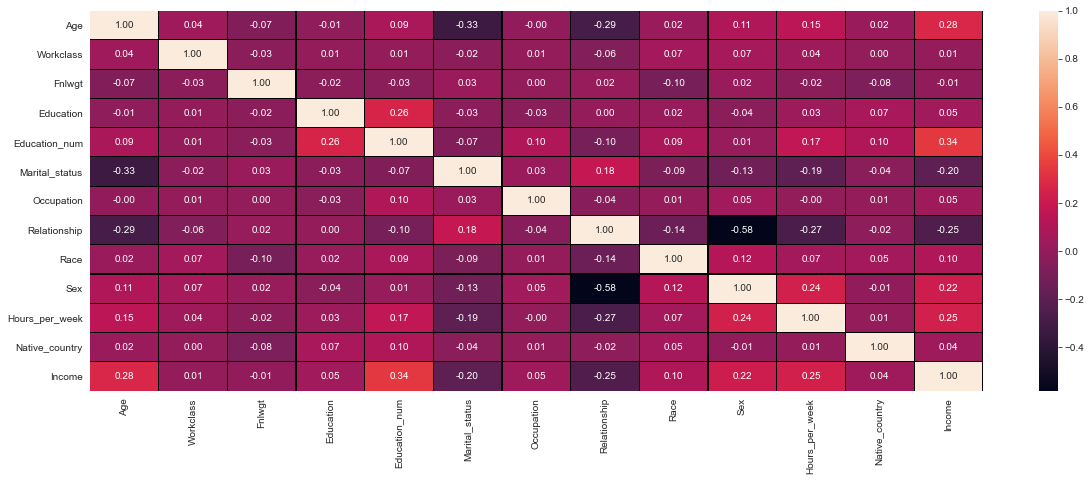

In [77]:
# Visualizing df_new_ce.corr() using heatmap
plt.figure(figsize=(20,7))
sns.heatmap(df_new_ce.corr(),annot=True,linewidths=0.1,linecolor="black",fmt=".2f")

From the above visualization, we see that the columns `Education_num, Age, Sex` and `Hours_per_week` have positive correlation with the target. The columns `Marital status` and `Relationship` have negative correlation with the target variable.
The columns `Relationship` and `Sex` are highly negatively correlated with each other. The columns `Fnlwgt` & `Workclass` have very less relation with the target variable so we can drop these columns if necessary.

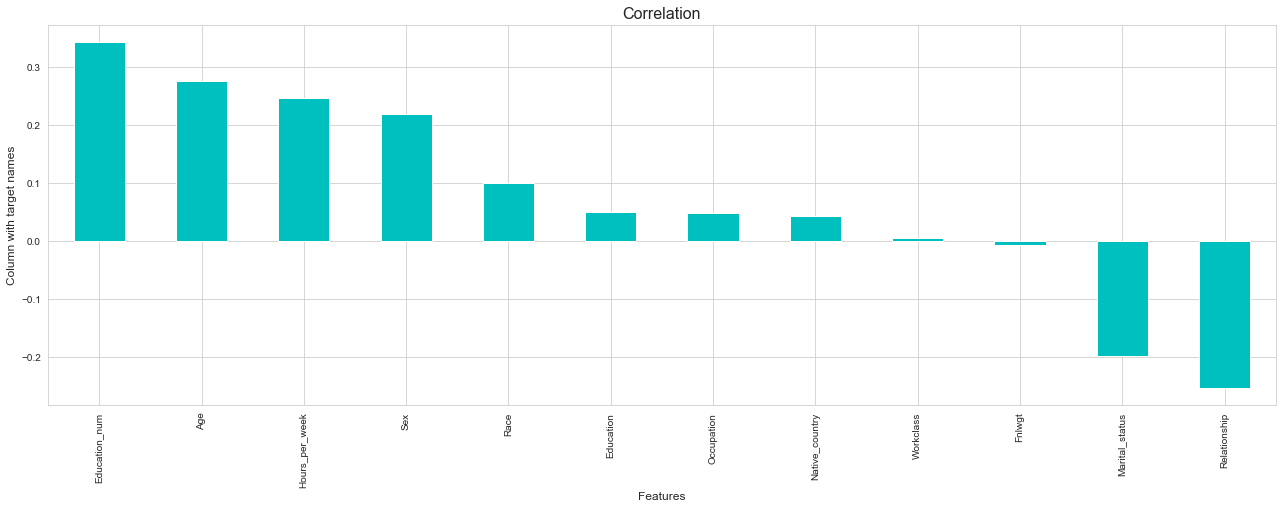

In [78]:
plt.figure(figsize=(22,7))
df_new_ce.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Column with target names',fontsize=12)
plt.title('Correlation',fontsize=16)
plt.show()

`Workclass` and `Fnlwgt` is very less correlated with target column.

# Model Building

In [79]:
x = df_new_ce.drop("Income",axis=1)
y = df_new_ce["Income"]

In [80]:
x.shape

(29296, 12)

In [81]:
y.shape

(29296,)

In [82]:
y.value_counts()

0    22178
1     7118
Name: Income, dtype: int64

# VIF

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,Features,VIF
0,Age,1.126707
1,Workclass,1.009690
2,Fnlwgt,1.022859
3,Education,1.081301
4,Education_num,1.145612
5,Marital_status,3.437093
6,Occupation,2.768544
7,Relationship,2.026939
8,Race,1.049208
9,Sex,2.619397


The multi collinearity of all columns is good (<10). There are no extreme values of VIF.

# Scaling

In [84]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x = pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.912041,1.752355,-1.126314,-0.497768,1.188851,-0.397702,-0.788485,-0.898303,0.34456,0.703887,-2.226410,0.203454
1,0.107725,-0.091133,0.415543,0.073630,-0.481551,-1.723346,-0.331861,-0.275290,0.34456,0.703887,-0.056269,0.203454
2,1.089465,-0.091133,0.596075,-2.085886,-1.272302,-0.397702,-0.331861,-0.898303,-2.90534,0.703887,-0.056269,0.203454
3,0.032269,-0.091133,1.038957,0.380933,1.622162,-0.397702,-0.788485,2.216760,0.34456,-1.420683,-0.056269,0.203454
4,0.851076,-0.091133,-0.155253,-1.237389,-2.025741,0.265120,0.124763,-0.275290,-2.90534,-1.420683,-2.022392,-3.872384
...,...,...,...,...,...,...,...,...,...,...,...,...
29291,-0.824077,-0.091133,0.801432,-1.007517,0.761431,-0.397702,1.494635,2.216760,0.34456,-1.420683,-0.238248,0.203454
29292,0.254186,-0.091133,-0.219933,0.073630,-0.481551,-0.397702,-0.103549,-0.898303,0.34456,0.703887,-0.056269,0.203454
29293,1.368664,-0.091133,-0.247681,0.073630,-0.481551,2.253585,-1.473421,1.593748,0.34456,-1.420683,-0.056269,0.203454
29294,-1.346776,-0.091133,0.276859,0.073630,-0.481551,0.927941,-1.473421,0.970735,0.34456,0.703887,-1.732854,0.203454


# SMOTE

In [85]:
y.value_counts()

0    22178
1     7118
Name: Income, dtype: int64

In [86]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x , y = sm.fit_resample(x,y)

In [87]:
y.value_counts()

0    22178
1    22178
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

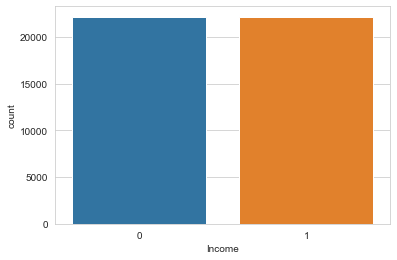

In [88]:
# Visualizing the data after oversampling
sns.countplot(y)

We have balanced the data using SMOTE.

# Best Random State

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [90]:
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.30, random_state = i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrs=lr.predict(x_test)
    acc=accuracy_score(y_test,predrs)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is :",maxAccu," on Random State :",maxRS)

Best accuracy is : 0.7626812955587284  on Random State : 184


In [91]:
# dividing the dataset for training and testing with best random state
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=.30, random_state=maxRS)

In [92]:
x_train.shape

(31049, 12)

In [93]:
y_train.shape

(31049,)

In [94]:
x_test.shape

(13307, 12)

In [95]:
y_test.shape

(13307,)

In [96]:
# scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [98]:
lg=LogisticRegression()
lg.fit(x_train, y_train)
lg.score(x_train, y_train)
pred_lg=lg.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

accuracy score:  0.7624558503043511
[[4921 1741]
 [1420 5225]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      6662
           1       0.75      0.79      0.77      6645

    accuracy                           0.76     13307
   macro avg       0.76      0.76      0.76     13307
weighted avg       0.76      0.76      0.76     13307



# Decision Tree Classifier

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dtc=dtc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

accuracy score:  0.7249567896595777
[[3575 3087]
 [ 573 6072]]
              precision    recall  f1-score   support

           0       0.86      0.54      0.66      6662
           1       0.66      0.91      0.77      6645

    accuracy                           0.72     13307
   macro avg       0.76      0.73      0.71     13307
weighted avg       0.76      0.72      0.71     13307



# GaussianNB Classifier

In [101]:
from sklearn.naive_bayes import GaussianNB

In [102]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
pred_gnb=gnb.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_gnb))
print(confusion_matrix(y_test,pred_gnb))
print(classification_report(y_test,pred_gnb))

accuracy score:  0.7611783271962125
[[4871 1791]
 [1387 5258]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      6662
           1       0.75      0.79      0.77      6645

    accuracy                           0.76     13307
   macro avg       0.76      0.76      0.76     13307
weighted avg       0.76      0.76      0.76     13307



# Gradient Boosting Classifier

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

In [104]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
pred_gcb=gbc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_gcb))
print(confusion_matrix(y_test,pred_gcb))
print(classification_report(y_test,pred_gcb))

accuracy score:  0.6627338994514166
[[2280 4382]
 [ 106 6539]]
              precision    recall  f1-score   support

           0       0.96      0.34      0.50      6662
           1       0.60      0.98      0.74      6645

    accuracy                           0.66     13307
   macro avg       0.78      0.66      0.62     13307
weighted avg       0.78      0.66      0.62     13307



# KNearest Neighbors Classifier

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_knn=knn.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

accuracy score:  0.8454948523333584
[[5111 1551]
 [ 505 6140]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      6662
           1       0.80      0.92      0.86      6645

    accuracy                           0.85     13307
   macro avg       0.85      0.85      0.84     13307
weighted avg       0.85      0.85      0.84     13307



# SVC

In [107]:
from sklearn.svm import SVC

In [108]:
svc = SVC()
svc.fit(x_train, y_train)
svc.score(x_train, y_train)
svc_pred = svc.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

accuracy score:  0.8254302246937701
[[5048 1614]
 [ 709 5936]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.81      6662
           1       0.79      0.89      0.84      6645

    accuracy                           0.83     13307
   macro avg       0.83      0.83      0.82     13307
weighted avg       0.83      0.83      0.82     13307



# Random Forest Classifier

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
pred_rfc=rfc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

accuracy score:  0.8074697527617044
[[4285 2377]
 [ 185 6460]]
              precision    recall  f1-score   support

           0       0.96      0.64      0.77      6662
           1       0.73      0.97      0.83      6645

    accuracy                           0.81     13307
   macro avg       0.84      0.81      0.80     13307
weighted avg       0.84      0.81      0.80     13307



# XGB Classifier

In [111]:
from xgboost import XGBClassifier

In [112]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)
pred_xgb=xgb.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_xgb))
print(confusion_matrix(y_test,pred_xgb))
print(classification_report(y_test,pred_xgb))

accuracy score:  0.5905914180506501
[[1219 5443]
 [   5 6640]]
              precision    recall  f1-score   support

           0       1.00      0.18      0.31      6662
           1       0.55      1.00      0.71      6645

    accuracy                           0.59     13307
   macro avg       0.77      0.59      0.51     13307
weighted avg       0.77      0.59      0.51     13307



From the above models, we see that the highest accuracy score belongs to `KNearest Neighbors Classifier`, followed by `SVC ` & `Random Forest Classifier`.

The lowest accuracy scores belong to `XGBoost Classifier`, `Gradient Boosting Classifier` & `Decision Tree Classifier`.

# Cross Validation Score

In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
scr_lg=cross_val_score(lg,x,y,cv=5)
print("Cross validation score of this model is: ",scr_lg.mean())

Cross validation score of this model is:  0.7526153902763577


In [115]:
scr_dtc=cross_val_score(dtc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_dtc.mean())

Cross validation score of this model is:  0.8310281020242147


In [116]:
scr_gnb=cross_val_score(gnb,x,y,cv=5)
print("Cross validation score of this model is: ",scr_gnb.mean())

Cross validation score of this model is:  0.7570565694704958


In [117]:
scr_gbc=cross_val_score(gbc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_gbc.mean())

Cross validation score of this model is:  0.8475526937095259


In [118]:
scr_knn=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of this model is: ",scr_knn.mean())

Cross validation score of this model is:  0.8487695110734068


In [119]:
scr_svc=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_svc.mean())

Cross validation score of this model is:  0.8214900270270024


In [120]:
scr_rfc=cross_val_score(rfc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_rfc.mean())

Cross validation score of this model is:  0.8826781732433998


In [121]:
scr_xgb=cross_val_score(xgb,x,y,cv=5)
print("Cross validation score of this model is: ",scr_xgb.mean())

Cross validation score of this model is:  0.871249316040687


The highest Cross Validation Score belongs to `Random Forest Classifier`, followed by `XGBoost Classifier`, `Gradient Boosting Classifier` & `KNearest Neighbors Classifier`.
Next, `Decision Tree Classifier` & `SVC`. And lastly, `GaussianNB` and `Logistic Regression`.

# Hyper Parameter Tuning

Since there is a very small difference between the accuracy score and cross validation score of `KNearest Neighbors model`, we shall consider it for hyper parameter tuning.

We shall use GridSearchCV for Hyper Parameter Tuning.

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
parameters = {
    'n_neighbors':[5,10,20],
    'algorithm':['auto','ball_tree', 'kd_tree'],
    'leaf_size':[30,40,50],
    'weights':['uniform','distance'],
    'p':[1,2,3]}
grid_knn=GridSearchCV(knn, param_grid = parameters, scoring = 'accuracy', cv = 10)

In [124]:
grid_knn.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': [30, 40, 50], 'n_neighbors': [5, 10, 20],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [125]:
grid_knn.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'distance'}

In [126]:
knn1=KNeighborsClassifier(n_neighbors=5,algorithm='auto',leaf_size=30,weights='distance',p=1)

knn1.fit(x_train,y_train)
pred=knn1.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:  0.8636056211016758
[[5256 1406]
 [ 409 6236]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      6662
           1       0.82      0.94      0.87      6645

    accuracy                           0.86     13307
   macro avg       0.87      0.86      0.86     13307
weighted avg       0.87      0.86      0.86     13307



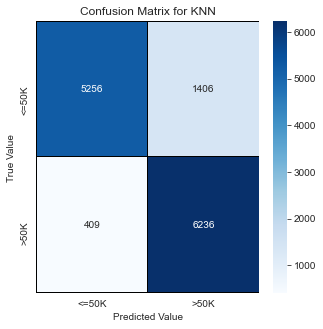

In [127]:
cm = confusion_matrix(y_test, pred)

x_axis_labels = ["<=50K",">50K"]
y_axis_labels = ["<=50K",">50K"]

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("True Value ")
plt.title('Confusion Matrix for KNN')
plt.show()

# ROC-AUC Curve

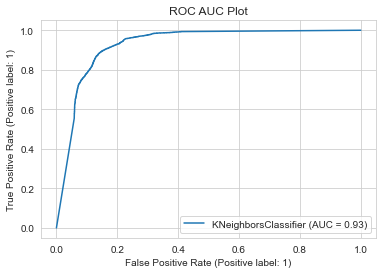

In [128]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(knn1,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

We have plotted the ROC-AUc curve, AUC score is `93 %`.

# Saving Model

In [129]:
import joblib
joblib.dump(knn1,"Census_Income_Project.pkl")

['Census_Income_Project.pkl']

# Prediction 

In [130]:
# Loading the saved model
census_model=joblib.load("Census_Income_Project.pkl")

# Prediction
prediction = census_model.predict(x_test)
prediction

array([0, 1, 0, ..., 0, 1, 1])

In [131]:
pd.DataFrame([census_model.predict(x_test)[:],y_test[:]],index=["Predicted Value","Actual Value"])

,0,1,2,3,4,5,6,7,8,9,...,13297,13298,13299,13300,13301,13302,13303,13304,13305,13306
Predicted Value,0,1,0,1,1,1,1,0,1,1,...,1,0,1,1,1,0,1,0,1,1
Actual Value,1,1,1,1,1,1,1,0,1,1,...,1,0,1,1,1,0,1,0,0,1


The above shows the predicted values and the actual values.They are almost similar.